# Cat and Dog Classifier

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [19]:
train_dir = r"cats_and_dogs\train"
validation_dir = r"cats_and_dogs\validation"
test_dir = r"cats_and_dogs\test"

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normal Classification using CNN

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

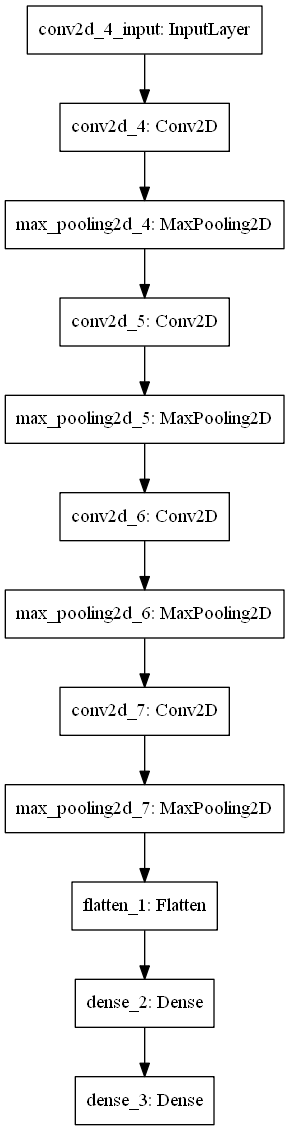

In [25]:
import pydot
keras.utils.plot_model(model)

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer = keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [27]:
model_history = model.fit(train_generator, epochs=20,
                         steps_per_epoch=100,
                         validation_data = validation_generator,
                         validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 77s 771ms/step - loss: 0.6950 - acc: 0.5200 - val_loss: 0.6839 - val_acc: 0.5770
Epoch 2/20
100/100 [==============================] - 118s 1s/step - loss: 0.6648 - acc: 0.6025 - val_loss: 0.6509 - val_acc: 0.6030
Epoch 3/20
100/100 [==============================] - 143s 1s/step - loss: 0.6204 - acc: 0.6575 - val_loss: 0.6565 - val_acc: 0.5870
Epoch 4/20
100/100 [==============================] - 98s 983ms/step - loss: 0.5759 - acc: 0.6910 - val_loss: 0.5981 - val_acc: 0.6760
Epoch 5/20
100/100 [==============================] - 112s 1s/step - loss: 0.5478 - acc: 0.7225 - val_loss: 0.6102 - val_acc: 0.6640
Epoch 6/20
100/100 [==============================] - 422s 4s/step - loss: 0.5299 - acc: 0.7360 - val_loss: 0.5787 - val_acc: 0.6770
Epoch 7/20
100/100 [==============================] - 85s 849ms/step - loss: 0.4969 - acc: 0.7580 - val_loss: 0.5651 - val

In [28]:
model_history.params

{'verbose': 1, 'epochs': 20, 'steps': 100}

In [29]:
model_history.history

{'loss': [0.6950422525405884,
  0.6648290157318115,
  0.6203858852386475,
  0.5759462714195251,
  0.5477854013442993,
  0.5299036502838135,
  0.49692580103874207,
  0.4782000482082367,
  0.45488542318344116,
  0.42286020517349243,
  0.4057345986366272,
  0.37780874967575073,
  0.360933393239975,
  0.32865574955940247,
  0.31963300704956055,
  0.28553035855293274,
  0.2716374397277832,
  0.2413972020149231,
  0.22265663743019104,
  0.20956338942050934],
 'acc': [0.5199999809265137,
  0.6025000214576721,
  0.6575000286102295,
  0.6909999847412109,
  0.7225000262260437,
  0.7360000014305115,
  0.7580000162124634,
  0.7724999785423279,
  0.784500002861023,
  0.8054999709129333,
  0.8169999718666077,
  0.8385000228881836,
  0.8360000252723694,
  0.8554999828338623,
  0.8615000247955322,
  0.8794999718666077,
  0.8895000219345093,
  0.902999997138977,
  0.9154999852180481,
  0.9160000085830688],
 'val_loss': [0.6839200854301453,
  0.6508697867393494,
  0.6565367579460144,
  0.598092794418335

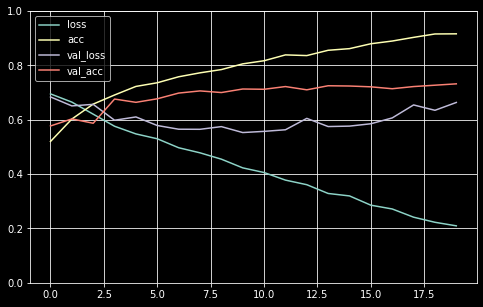

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.save('CNN Sequential Model - Cat and Dog Normal Classifier.h5')

In [45]:
del model
keras.backend.clear_session()